# Inversion of primary potentials

In [0]:
import matplotlib.pyplot as plt
from icsd3d_class import iCSD3d as i3d
from plotters.mpl_plot import showObs2d
from scipy.special import gamma
from scipy.optimize import least_squares
import numpy as np

In [25]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## UNconstrainsted inversion
### Define inversion parameters
We start with an unconstrainsted inversion (no initial guess, no prior model)

In [0]:
icsdPath = './EGU_TDIP/' # schemeMALM_full test

icsd=i3d(dirName=icsdPath)   
icsd.logTrans=True

icsd.regMesh='strc'
icsd.type='2d'
icsd.obs_err='sqrt' # sqrt choose between constant weight and w = 1/sqrt(abs(obs))
icsd.wr=1 # weight regularization
icsd.alphaSxy=False # anisotropic model smoothing coeff
icsd.x0_prior=False # initial model
icsd.x0_ini_guess=False # initial guess
icsd.method_m0='F1'

### Create the survey and invert

In [0]:
vp = icsd.createSurvey(fname_obs='Obs_raw.txt',fname_sim='VRTe_SIM_Vp.txt')
sol= icsd.invert(wr=1)
#sol= icsd.invert(pareto=True,pareto_MinErr=0.01, pareto_MaxErr=100, pareto_nSteps=10)

no existing survey
initiation ICSD
(17250,)
************************************
log transformation: True
TO DO need to log-trans data errors as well
obs_err: sqrt
b = 0 could be a problem, check presence of 0 and filter if needed
errRmin not correctly set, adjust
./EGU_TDIP/
wr = 1
run_single i=0
UNconstrainsted inversion
********************
CURRENT Sum=0.9999999811346332


C:\Users\Benjamin\Documents\Software\SourceInversion\branch_icsd_dev\icsd3d\inversion\solve.py:91: RuntimeWarning: divide by zero encountered in true_divide
  obs_w = 1 / np.sqrt(np.abs(b))


### Show results

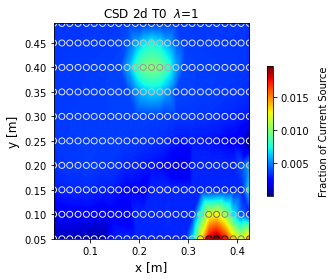

In [26]:
fig, ax = plt.subplots()
icsd.showResults(ax=ax)
plt.savefig(icsdPath+'Obs_raw.png', dpi=400)
plt.show()

## Constrainsted inversion
### Define inversion parameters

In [0]:
icsdPath = './EGU_TDIP/' # schemeMALM_full test

icsd=i3d(dirName=icsdPath)   
icsd.logTrans=False

icsd.regMesh='strc'
icsd.type='2d'
icsd.obs_err='sqrt' # sqrt choose between constant weight and w = 1/sqrt(abs(obs))
icsd.wr=1 # weight regularization
icsd.alphaSxy=True # anisotropic model smoothing coeff
icsd.x0_prior=True # initial model
icsd.x0_ini_guess=True # initial guess
icsd.method_m0='F1'

vp = icsd.createSurvey(fname_obs='Obs_raw.txt',fname_sim='VRTe_SIM_Vp.txt')
sol= icsd.invert(wr=1)


no existing survey
initiation ICSD
(17250,)
************************************
log transformation: False
obs_err: sqrt
./EGU_TDIP/
wr = 1
run_single i=0
reg Wm (smallness + spatial reg) * lambda=1
constrainsted inversion
CURRENT Sum=1.0000000009808152


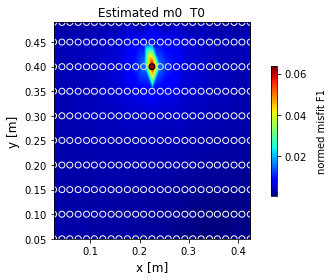

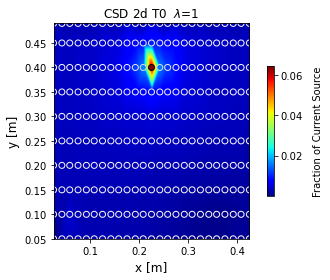

In [0]:
fig, ax = plt.subplots()
m0 = icsd.estimateM0(method_m0='F1',show=True, ax=ax)
plt.show()

fig, ax = plt.subplots()
icsd.showResults(ax=ax)
plt.savefig(icsdPath+'Obs_raw.png', dpi=400)
plt.show()